# Linear regression on Automobile dataset

In [1]:
import pandas as pd
path='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(path,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
df.tail(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2661,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950


In [3]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
print(headers)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [11]:
df[['length','compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


In [12]:
df.info

<bound method DataFrame.info of      symboling normalized-losses         make  ... city-mpg highway-mpg  price
0            3                 ?  alfa-romero  ...       21          27  13495
1            3                 ?  alfa-romero  ...       21          27  16500
2            1                 ?  alfa-romero  ...       19          26  16500
3            2               164         audi  ...       24          30  13950
4            2               164         audi  ...       18          22  17450
..         ...               ...          ...  ...      ...         ...    ...
200         -1                95        volvo  ...       23          28  16845
201         -1                95        volvo  ...       19          25  19045
202         -1                95        volvo  ...       18          23  21485
203         -1                95        volvo  ...       26          27  22470
204         -1                95        volvo  ...       19          25  22625

[205 rows x 26 colu

#Data Wrangling

In [13]:
import numpy as np
df.replace('?',np.NaN,inplace=True)

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
missing_data=df.isnull()

In [16]:
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#Counting missing values in each column
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Replacing Nan by required values

In [18]:
avg_norm_loss=df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.NaN,avg_norm_loss,inplace=True)

In [19]:
avg_bore=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.NaN,avg_bore,inplace=True)

In [20]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.NaN,avg_stroke,inplace=True)

In [21]:
avg_horsepower=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.NaN,avg_horsepower,inplace=True)

In [22]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.NaN,avg_peakrpm,inplace=True)

In [23]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [24]:
df['num-of-doors'].replace(np.NaN,'four',inplace=True)

In [25]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
df[['bore','stroke','price','peak-rpm']]=df[['bore','stroke','price','peak-rpm']].astype('float')
df[['normalized-losses']]=df[['normalized-losses']].astype('int')

Data Standardization 

In [28]:
df['city-L/100km']=235/df['city-mpg']

In [29]:
df['highway-mpg']=235/df['highway-mpg']
df.rename(columns={'highway-mpg':'highway-L/100km'},inplace=True)

Data Normalization

In [30]:
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()
df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Binning

In [31]:
df['horsepower']=df['horsepower'].astype(int,copy=True)

Text(0.5, 1.0, 'HORSEPOWER BINS')

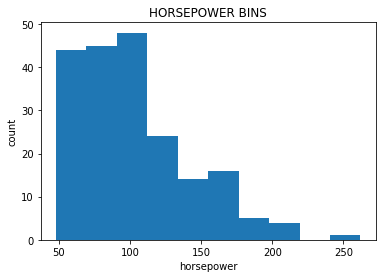

In [32]:
import matplotlib.pyplot as plt
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('HORSEPOWER BINS')

In [33]:
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)

In [34]:
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [35]:
group_names=['Low','Medium','High']

In [36]:
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_names,
                               include_lowest=True)
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [37]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower-bins')

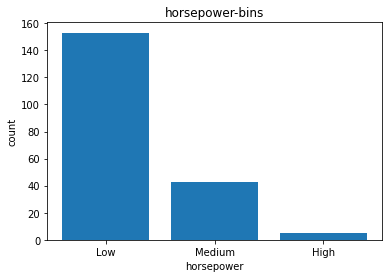

In [38]:
plt.bar(group_names,df['horsepower-binned'].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower-bins')

Text(0.5, 1.0, 'horsepower-bins')

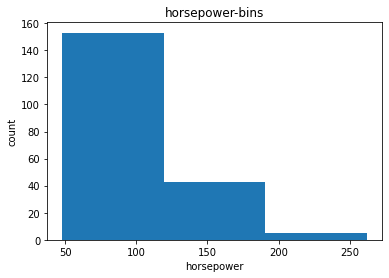

In [39]:
plt.hist(df['horsepower'],bins=3)
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower-bins')

Dummy Variables

In [40]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [41]:
dummy_vari=pd.get_dummies(df['fuel-type'])
dummy_vari.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
dummy_vari.rename(columns={'fuel-type-diesel':'gas',
                           'fuel-type-diesel':'diesel'},
                  inplace=True)

In [43]:
dummy_vari.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
df=pd.concat([df,dummy_vari],axis=1)
df.drop('fuel-type',axis=1,inplace=True)

In [45]:
dummy_vari_2=pd.get_dummies(df['aspiration'])
dummy_vari_2.rename(columns={'std':'aspiration-std',
                             'turbo':'aspiration-turbo'},inplace=True)

In [46]:
dummy_vari_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
df=pd.concat([df,dummy_vari_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)

In [48]:
df.to_csv('clean_df.csv')

Data Analysis

In [49]:
import numpy as np
import pandas as pd
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
#path='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
#df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df.dtypes

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-L/100km       float64
price                 float64
city-L/100km          float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

In [52]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [53]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


Continous Numerical Variable

(0.0, 53178.19743860317)

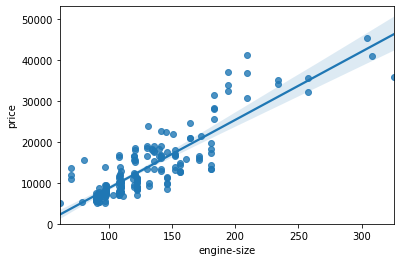

In [54]:
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

In [55]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [56]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

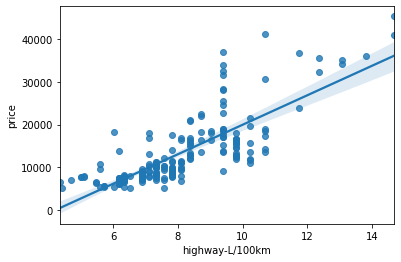

In [57]:
sns.regplot(x='highway-L/100km',y='price',data=df)

In [58]:
df[['highway-L/100km','price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


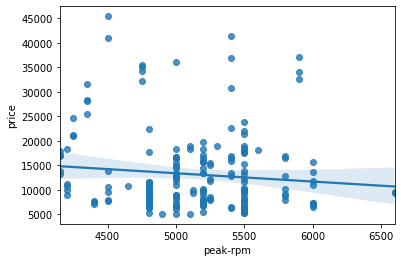

In [59]:
sns.regplot(x='peak-rpm',y='price',data=df)

In [60]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [61]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


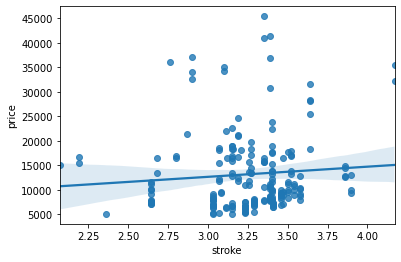

In [62]:
sns.regplot(x='stroke',y='price',data=df)

Categorical Variables

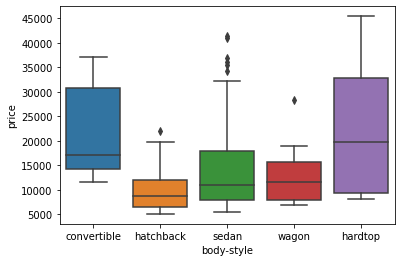

In [63]:
sns.boxplot(x='body-style',y='price',data=df)

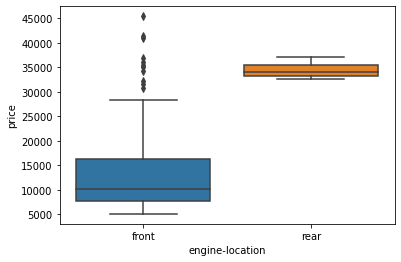

In [64]:
sns.boxplot(x='engine-location',y='price',data=df)

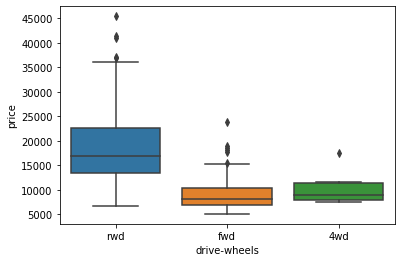

In [65]:
sns.boxplot(x='drive-wheels',y='price',data=df)

Descrictive Statistical Analysis

In [66]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [67]:
df.describe(include='all')

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,0.899108,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,NaN,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,0.040933,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,NaN,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,0.799331,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,0.869565,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,0.904682,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,0.928094,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,NaN,0.000000,1.000000,1.000000,0.000000


In [68]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [69]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [70]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [71]:
drive_wheel_counts=df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive_wheels':'value_counts'},inplace=True)
drive_wheel_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [72]:
drive_wheel_counts.index.name='drive_wheels'
drive_wheel_counts

,drive-wheels
drive_wheels,
fwd,118
rwd,75
4wd,8


In [73]:
engine_loc_counts=df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine_location':'value_counts'},inplace=True)
engine_loc_counts.index.name='engine_location'
engine_loc_counts

,engine-location
engine_location,
front,198
rear,3


Grouping

In [74]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [75]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [76]:
df_group_one=df[['drive-wheels','body-style','price']]

In [77]:
df_group_one=df_group_one.groupby(['drive-wheels'],as_index=False).mean()

In [78]:
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [79]:
df_grptest=df[['drive-wheels','body-style','price']]
grp_test1=df_grptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grp_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [80]:
grouped_pivot=grp_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [81]:
grouped_pivot=grouped_pivot.fillna(0)
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [82]:
df_gptest2=df[['body-style','price']]
grouped_test_bodystyle=df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


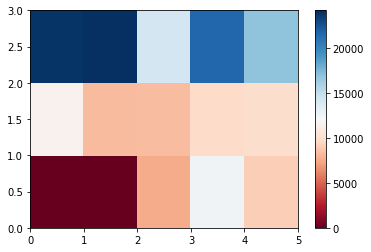

In [83]:
plt.pcolor(grouped_pivot,cmap='RdBu')#heatmap
plt.colorbar()
plt.show()

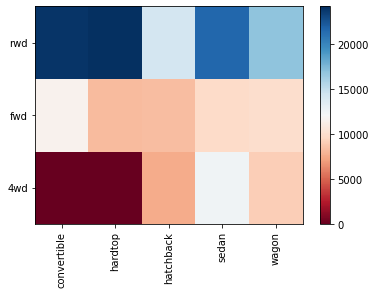

In [84]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Correlation

In [85]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [86]:
from scipy import stats

In [87]:
pearson_coef,p_value=stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [88]:
pearson_coef,p_value=stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48


In [89]:
pearson_coef,p_value=stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


In [90]:
pearson_coef,p_value=stats.pearsonr(df['curb-weight'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53


In [91]:
pearson_coef,p_value=stats.pearsonr(df['engine-size'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


In [92]:
pearson_coef,p_value=stats.pearsonr(df['bore'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


In [93]:
pearson_coef,p_value=stats.pearsonr(df['city-mpg'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29


In [94]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

In [95]:
pearson_coef,p_value=stats.pearsonr(df['highway-L/100km'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,
      " with a P-value of P =",p_value)

The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P = 3.046784581041456e-46


In [96]:
grouped_test2=df_grptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [97]:
df_grptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [98]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

ANOVA

In [99]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                           grouped_test2.get_group('rwd')['price'],
                           grouped_test2.get_group('4wd')['price'])
print('ANOVA Result: F=',f_val,',P =',p_val)

ANOVA Result: F= 67.95406500780399 ,P = 3.3945443577151245e-23


In [100]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                           grouped_test2.get_group('rwd')['price'])
print('ANOVA Result: F=',f_val,',P =',p_val)

ANOVA Result: F= 130.5533160959111 ,P = 2.2355306355677845e-23


In [101]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('rwd')['price'],
                           grouped_test2.get_group('4wd')['price'])
print('ANOVA Result: F=',f_val,',P =',p_val)

ANOVA Result: F= 8.580681368924756 ,P = 0.004411492211225333


In [102]:
f_val,p_val=stats.f_oneway(grouped_test2.get_group('fwd')['price'],
                           grouped_test2.get_group('4wd')['price'])
print('ANOVA Result: F=',f_val,',P =',p_val)

ANOVA Result: F= 0.6654657502523033 ,P = 0.41620116697845666


#Model Development

In [103]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

In [105]:
X=df[['highway-L/100km']]
Y=df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
Yhat=lm.predict(X)
Yhat[0:5]

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [107]:
print(lm.intercept_,lm.coef_)

-14617.843054664605 [3458.68511314]


In [108]:
lm1=LinearRegression()
X=df[['engine-size']]
Y=df['price']
lm1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
Yhat=lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [110]:
print(lm1.intercept_,lm1.coef_)

-7963.338906281042 [166.86001569]


Multiple Linear Regression

In [111]:
Z=df[['horsepower','curb-weight','engine-size','highway-L/100km']]
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
print(lm.intercept_,lm.coef_)

-14385.634549360107 [ 36.6377371    3.50038215  85.37370862 500.51979785]


(0.0, 47539.30124506118)

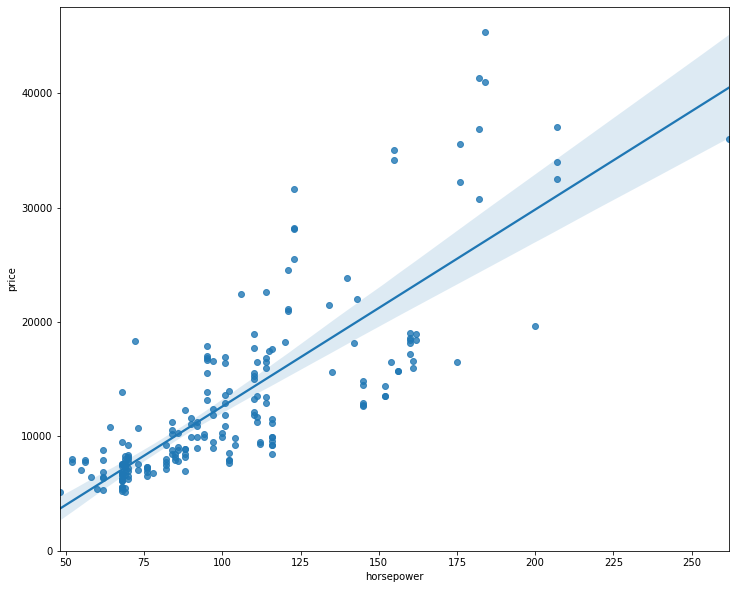

In [113]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='horsepower',y='price',data=df)
plt.ylim(0,)

(0.0, 47414.1)

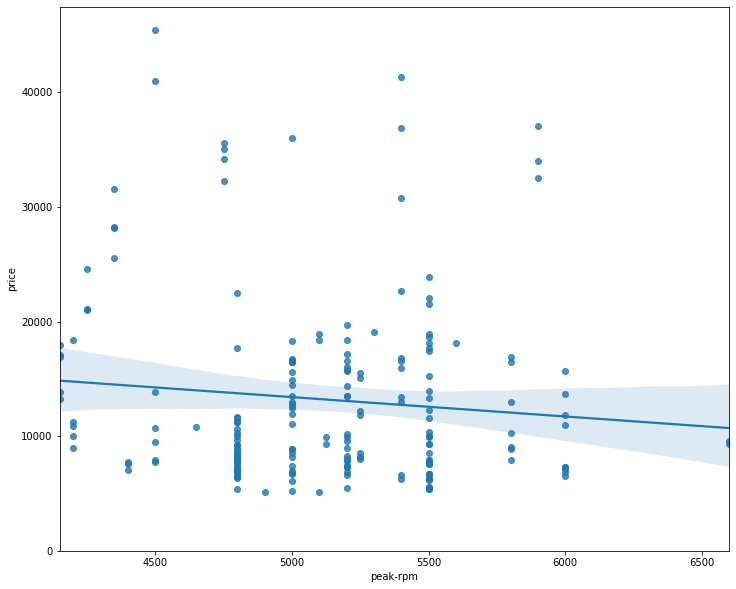

In [114]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [115]:
df[['peak-rpm','highway-L/100km','price']].corr()

,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017694,-0.101616
highway-L/100km,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


(0.0, 33129.935334087364)

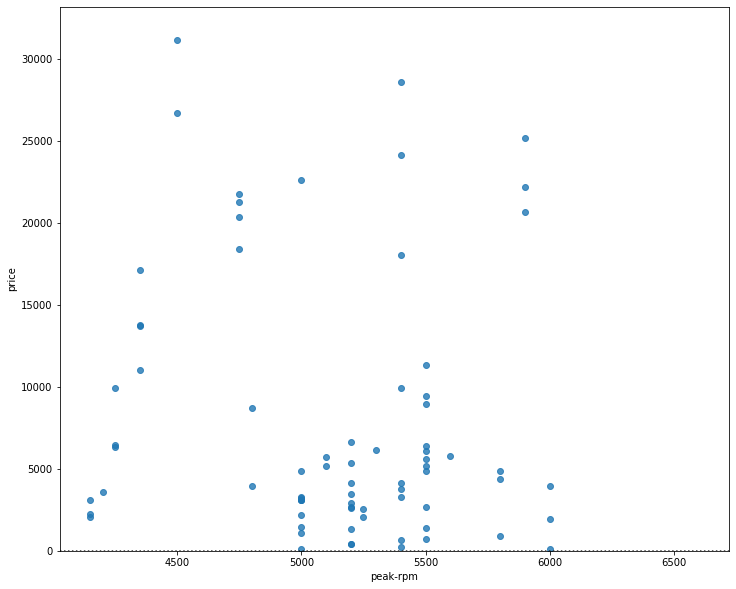

In [116]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

Checking Multiple Regression 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


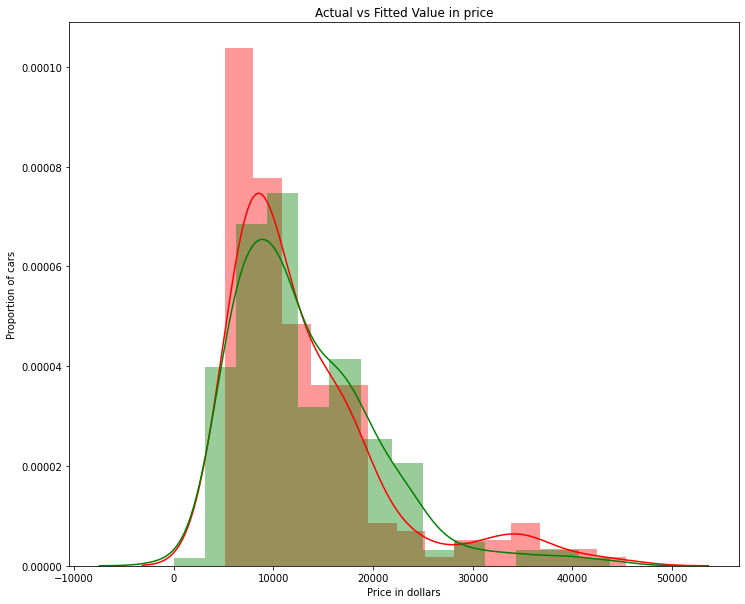

In [117]:
Yhat=lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],color='r',label='Actual Value')#hist=False for removing histogram
sns.distplot(Yhat,color='g',label='Actual Value')#hist=False
plt.title('Actual vs Fitted Value in price')
plt.xlabel('Price in dollars')
plt.ylabel('Proportion of cars')
plt.show()
plt.close()

Polynomial Regression

In [118]:
def Pollyplot(model,independent_variable,dependent_variable,Name):
  x_new=np.linspace(15,55,100)
  y_new=model(x_new)
  plt.plot(independent_variable,dependent_variable,'.',x_new,y_new,'-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax=plt.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig=plt.gcf()
  plt.xlabel(Name)
  plt.ylabel('Price of cars')
  plt.show()
  plt.close()

In [119]:
x=df['highway-L/100km']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


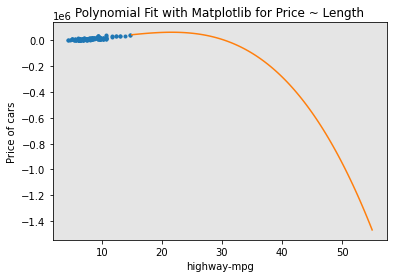

In [120]:
Pollyplot(p,x,y,'highway-mpg')

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


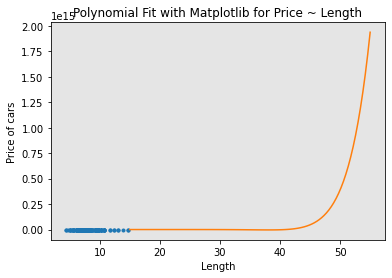

In [121]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)#U
print(p)
Pollyplot(p1,x,y,'Length')

In [122]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [123]:
Z_pr=pr.fit_transform(Z)

In [124]:
Z.shape

(201, 4)

In [125]:
Z_pr.shape

(201, 15)

Pipeline

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [127]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [128]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [129]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [130]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

In [131]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([14055.08612634, 14055.08612634, 18638.8884263 , 10758.2803759 ,
       16670.07025864, 14735.68505426, 15915.31383891, 16300.35587545,
       18610.89141407, 10974.48897133])

**Evaluation**

Simple Linear Regression

In [132]:
lm.fit(X,Y)
lm.score(X,Y)#R^2 error

0.7609686443622008

In [133]:
Yhat=lm.predict(X)#Single linear Regression
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [134]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],Yhat)#Mse

In [135]:
mse

15021126.025174143

Multiple Linear Regression

In [136]:
lm.fit(Z,df['price'])#Multiple Linear Regression
lm.score(Z,df['price'])

0.811811561534475

In [137]:
Y_predict_multifit=lm.predict(Z)#Mse

In [138]:
mean_squared_error(df['price'],Y_predict_multifit)

11826072.956532085

Multiple Linear Regression

In [139]:
from sklearn.metrics import r2_score
r_squared=r2_score(y,p(x))
r_squared

0.6753581660812172

In [140]:
mean_squared_error(df['price'],p(x))

20401030.180019394

Prediction

In [141]:
new_input=np.arange(1,100,1).reshape(-1,1)

In [142]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

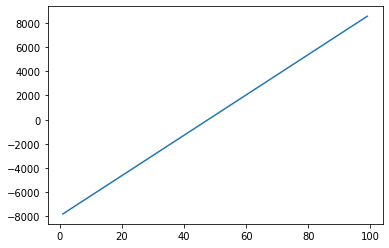

In [144]:
plt.plot(new_input,yhat)
plt.show()

Decision Making


*   Model with the higher R-squared value is a better fit for the data.
*   Model with the smallest MSE value is a better fit for the data.



# Linear Regression Automobile Dataset(Model Enhancement) 

In [145]:
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,0,1,1,0


In [146]:
def DistributionPlot(Redfunction,Bluefunction,RedName,BlueName,Title):
  width=12
  height=10
  plt.figure(figsize=(width,height))
  ax1=sns.distplot(Redfunction,hist=False,color='r',label='Actual Values')
  ax2=sns.distplot(Bluefunction,hist=False,color='b',label='Predicted Values')
  plt.title(Title)
  plt.xlabel('Price')
  plt.ylabel('Proportion of Cars')
  plt.show()
  plt.close()

In [147]:
def Pollyplot(xtrain,xtest,ytrain,ytest,lr,poly_transform):
  width=12
  height=10
  xmax=max([xtrain.values.max(),xtest.values.max()])
  xmin=min([xtrain.values.min(),xtest.values.min()])
  x=np.arange(xmin,xmax,0.1)
  plt.plot(xtrain,ytrain,'ro',label='Training Data')
  plt.plot(xtest,ytest,'go',label='Test Data')
  plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
  plt.ylim([-10000,60000])
  plt.ylabel('Price')
  plt.legend()

Training and Testing

In [148]:
y_data=df['price']
x_data=df.drop('price',axis=1)

In [149]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=0.15,random_state=1)
print('number of training sample:',xtrain.shape[0])
print('number of testing sample:',xtest.shape[0])

number of training sample: 170
number of testing sample: 31


In [150]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain[['horsepower']],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
lr.score(xtrain[['horsepower']],ytrain)

0.6450110239384647

In [152]:
lr.score(xtest[['horsepower']],ytest)

0.7076967079117262

Cross Validation

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
Rcross=cross_val_score(lr,x_data[['horsepower']],y_data,cv=4)

In [155]:
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [156]:
print('Mean:',Rcross.mean(),'Std:',Rcross.std())

Mean: 0.5220592359225414 Std: 0.29130480666118436


In [157]:
cross_val_score(lr,x_data[['horsepower']],y_data,cv=4,
                scoring='neg_mean_squared_error')

array([-20251357.7835463 , -43743920.05390439, -12525158.34507633,
       -17564549.69976653])

In [158]:
Rcross1=cross_val_score(lr,x_data[['horsepower']],y_data,cv=2)
Rcross1

array([0.59020493, 0.44346527])

In [159]:
from sklearn.model_selection import cross_val_predict

In [160]:
yhat=cross_val_predict(lr,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

**Overfitting,Underfitting and Model Selection**

In [162]:
lr=LinearRegression()
lr.fit(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
yhat_train=lr.predict(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']])
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

In [164]:
yhat=lr.predict(xtest[['horsepower','curb-weight','engine-size','highway-L/100km']])
yhat[0:5]

array([11076.33081952,  5885.37353698, 11295.89164789,  6891.58097338,
       15340.09329174])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


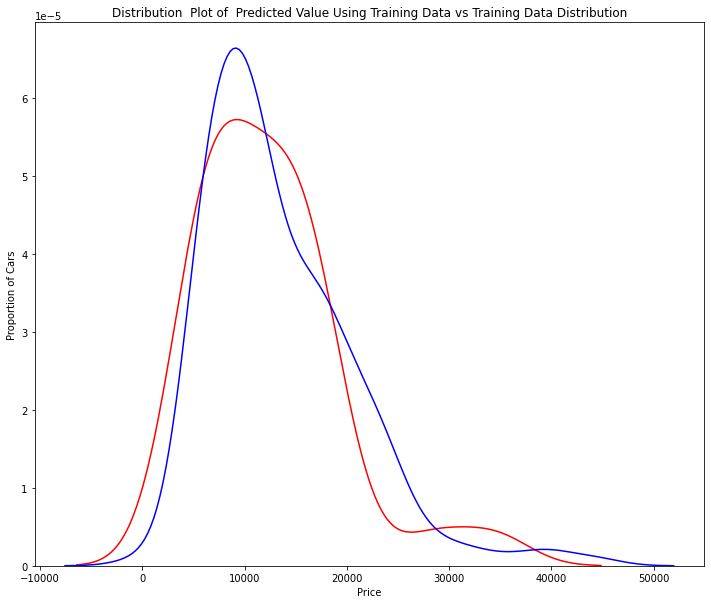

In [165]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(yhat,yhat_train,'Actual Values(Train)','Predicted Values(Train)',Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


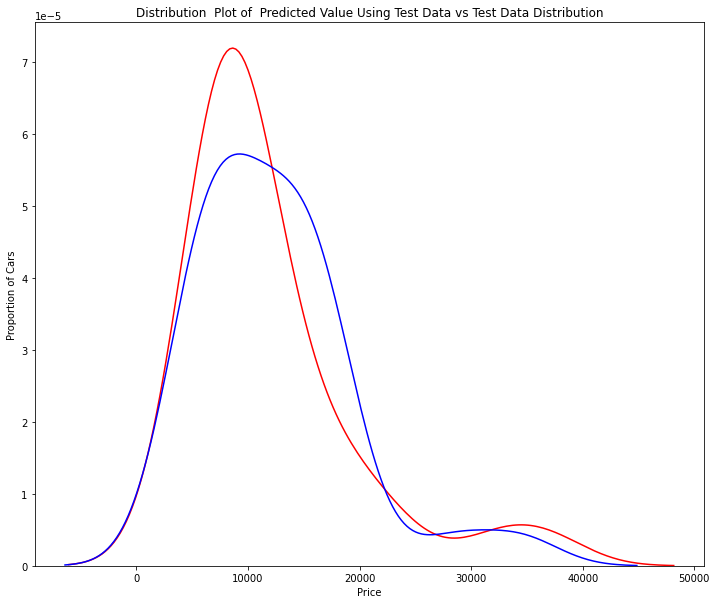

In [166]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(ytest,yhat,'Actual Values(Test)','Predicted Values(Test)',Title)

In [167]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

In [169]:
pr=PolynomialFeatures()
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])

In [170]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 7687.91957995,  8113.75734801, 11305.27864817, 20136.77590338,
       20787.01279536])

In [172]:
print('Predicted Values',yhat[0:6])
print('True Values',ytest[0:6].values)

Predicted Values [ 7687.91957995  8113.75734801 11305.27864817 20136.77590338
 20787.01279536  9839.59565697]
True Values [ 9549.  6229. 10245.  7295.  9989.  6338.]


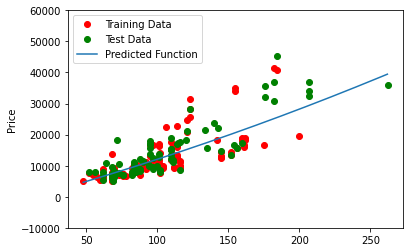

In [173]:
Pollyplot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

R^2 of training data and test data

In [174]:
poly.score(x_train_pr,y_train)

0.5330836546936898

In [175]:
poly.score(x_test_pr,y_test)

0.7405883774810658

R^2 of each order of polynomial

Text(3.2, 0.73, 'Maximum R^2')

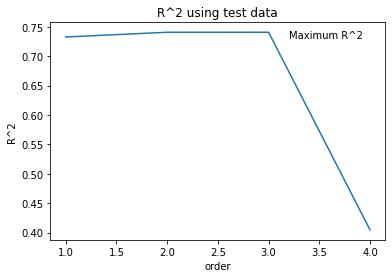

In [176]:
Rsqu_test=[]
order=[1,2,3,4]
for n in order:
  pr=PolynomialFeatures(degree=n)
  x_train_pr=pr.fit_transform(x_train[['horsepower']])
  x_test_pr=pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr,y_train)
  Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3.2,0.73,'Maximum R^2')  

In [179]:
df.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'diesel', 'gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [180]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])

Ridge Regression

In [181]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)

In [182]:
RidgeModel.fit(x_train_pr,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02748e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [183]:
yhat=RidgeModel.predict(x_test_pr)

In [185]:
print('predicted',yhat[:5])
print('test set',y_test[:5].values)

predicted [ 5547.45797502 10300.41178393 21672.72800189 19342.30072745
 21085.15954639]
test set [ 6295. 10698. 13860. 13499. 15750.]


In [186]:
Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
ALPHA=10*np.array(range(0,1000))
for alfa in ALPHA:
  RidgeModel=Ridge(alpha=alfa)
  RidgeModel.fit(x_train_pr,y_train)
  Rsqu_test.append(RidgeModel.score(x_test_pr,y_test))
  Rsqu_train.append(RidgeModel.score(x_train_pr,y_train))

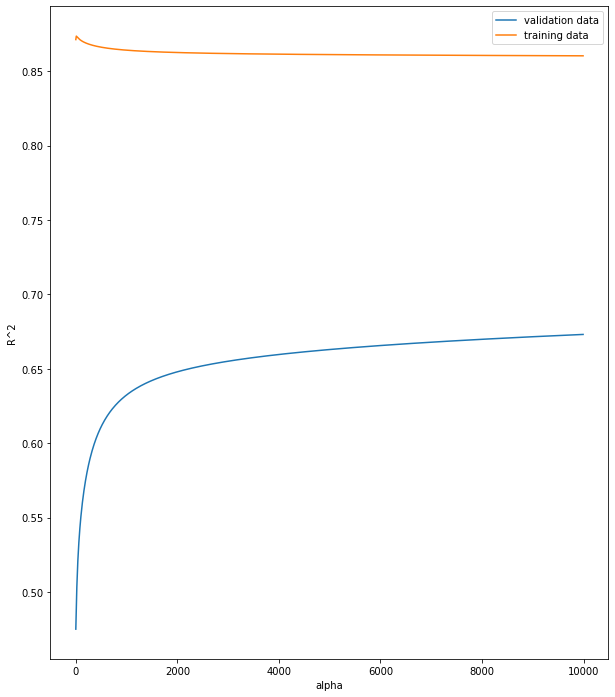

In [187]:
width=10
height=12
plt.figure(figsize=(width,height))
plt.plot(ALPHA,Rsqu_test,label='validation data')
plt.plot(ALPHA,Rsqu_train,label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

Grid Search

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
parameters=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
parameters

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [190]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [192]:
Grid=GridSearchCV(RR,parameters,cv=4)

In [193]:
Grid.fit(x_data[['horsepower','curb-weight','engine-size','highway-L/100km']],y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [194]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [196]:
BestRR.score(x_test[['horsepower','curb-weight','engine-size','highway-L/100km']],y_test)

0.8411508430484376